### LGM VIRTUAL INTERNSHIP PROGRAM 
### DATA SCIENCE 
### INTERMEDIATE LEVEL TASK 2 :Prediction using Decision Tree Algorithm

In [2]:
#Importing the libaries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets

In [152]:
#Loading Dataset
data=datasets.load_iris()

In [153]:
#List of Target Dataset
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [154]:
#Reading the dataset
data=pd.concat( (pd.DataFrame(data.data,columns=data.feature_names), pd.DataFrame(data.target,columns=['target']) ),axis=1)

In [155]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


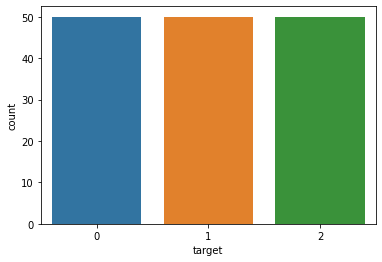

In [81]:
#Ensuring that we have a balanced target samples
sns.countplot(x='target',data=data)
plt.show()

<AxesSubplot:>

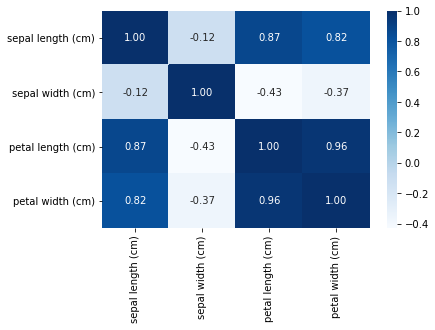

In [87]:
#Removing higly correlated data from the dataset
sns.heatmap(data.drop(columns='target').corr(),cmap='Blues',fmt='.2f',annot=True)

In [93]:
#new dataset
X=data.iloc[:,[0,2]]
Y=data.iloc[:,-1]

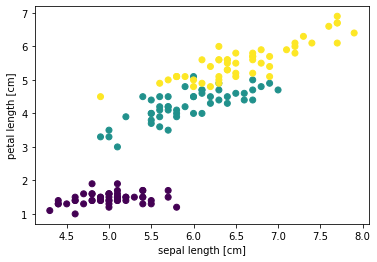

In [148]:
#plotting the new dataset
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

The decisions or the test are performed on the basis of features of the given dataset.

It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

In [96]:
#Creating a base model without hyper parameter tuning
decision_tree_base=DecisionTreeClassifier()

In [97]:
decision_tree_base.fit(X,Y)

DecisionTreeClassifier()

In [106]:
#calculating the score 
decision_tree_base.score(X,Y)

0.9933333333333333

Text(0.9166666666666666, 0.4375, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')

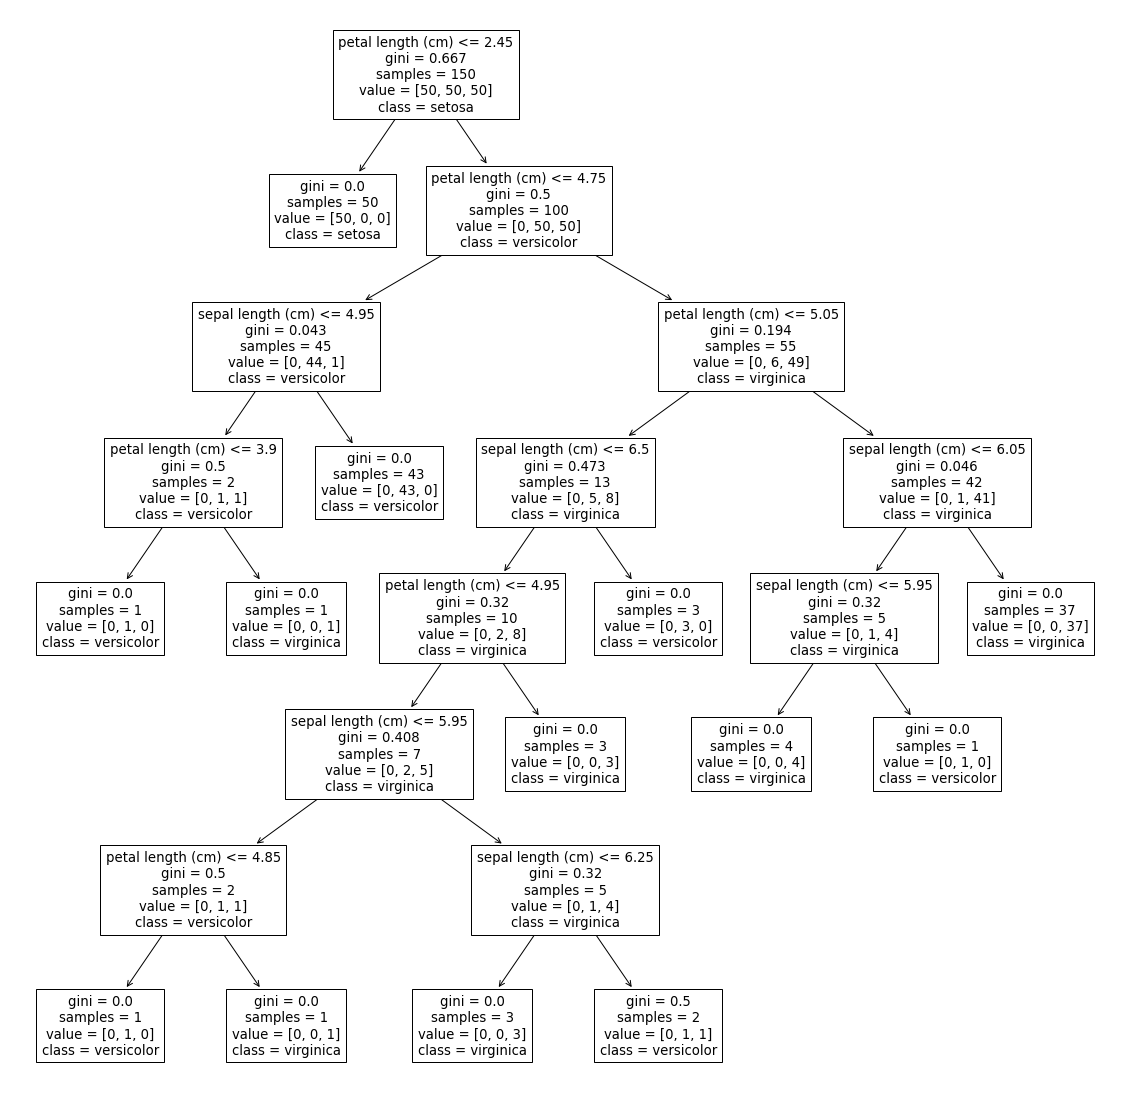

In [103]:
#plotting the decision tree generated using base estimator
plt.figure(figsize=(20,20))
plot_tree(decision_tree_base,feature_names=['sepal length (cm)','petal length (cm)'],class_names=['setosa', 'versicolor', 'virginica'])[-1]

E:\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


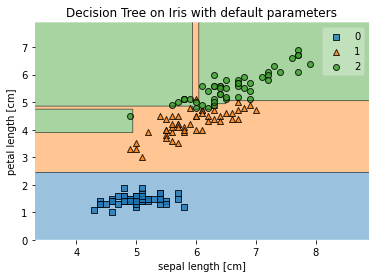

In [139]:
#Plotting the decision boundaries for the base model
plot_decision_regions(np.array(X),np.array(Y),decision_tree_base)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Decision Tree on Iris with default parameters')
plt.show()

### Hyper Parameter Tuning for Decision Tree

In [111]:
param_grid={
    'max_depth':[2,4,8,10,None],
    'max_features':[0.25,0.5,1.0],
    'criterion':['gini','entropy']
}

grid=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

In [112]:
grid.fit(X,Y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0]})

In [117]:
#extracting the best estimator provided by GridSearchCV
grid.best_score_,grid.best_estimator_

(0.9466666666666667, DecisionTreeClassifier(max_depth=2, max_features=1.0))

In [118]:
#Generating a Decision Tree Model using estimator provided by GridSeachCV
decision_tree_best=DecisionTreeClassifier(max_depth=2, max_features=1.0)

In [119]:
decision_tree_best.fit(X,Y)

DecisionTreeClassifier(max_depth=2, max_features=1.0)

In [122]:
#accuracy 
decision_tree_best.score(X,Y)

0.9533333333333334

Text(0.9166666666666666, 0.4375, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')

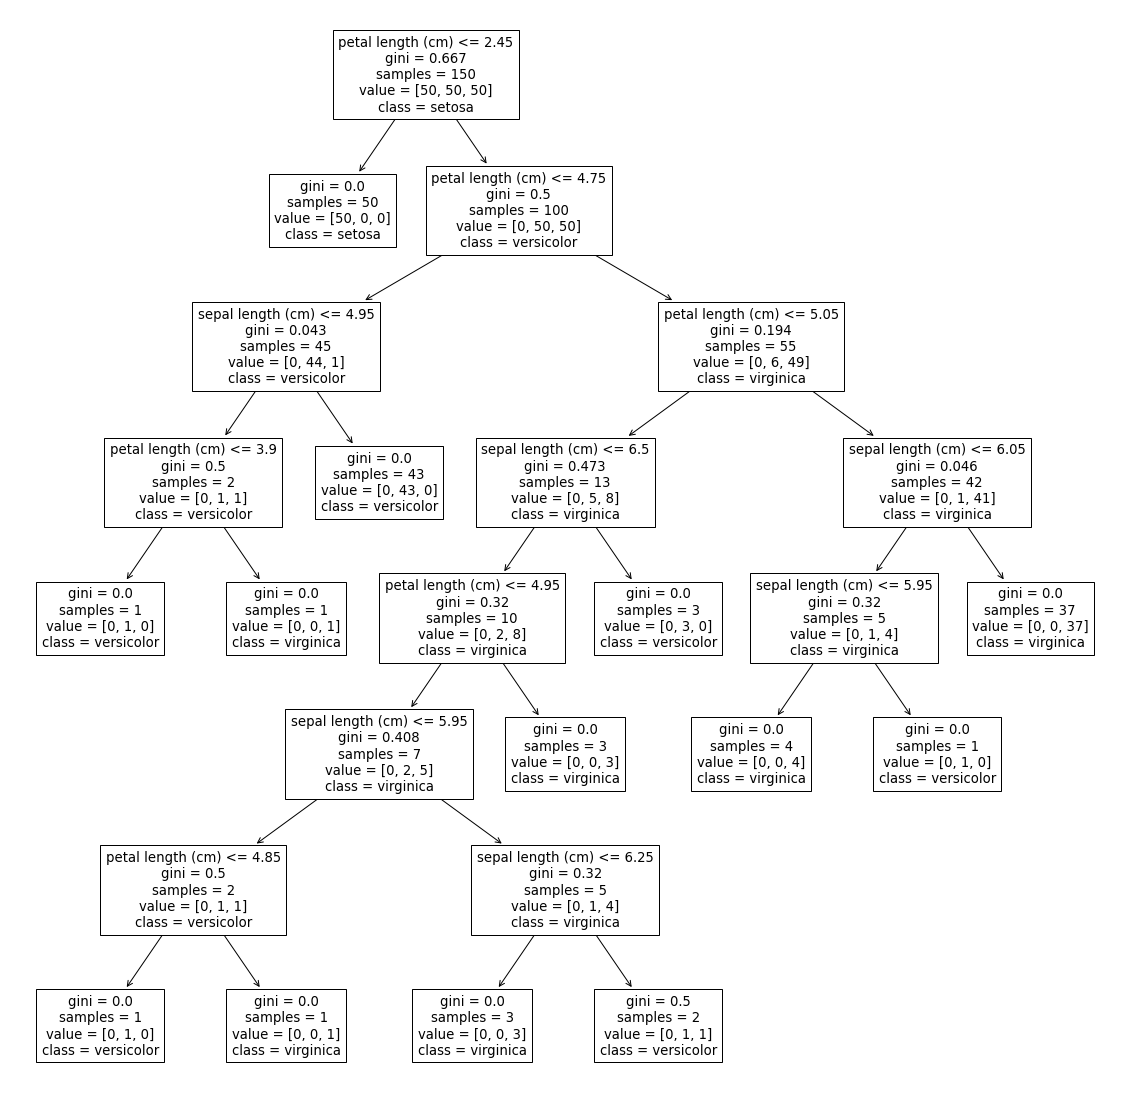

In [123]:
#Plotting the decision Tree
plt.figure(figsize=(20,20))
plot_tree(decision_tree_base,feature_names=['sepal length (cm)','petal length (cm)'],class_names=['setosa', 'versicolor', 'virginica'])[-1]

E:\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


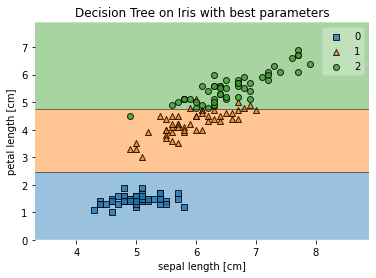

In [138]:
#Decision Tree Boundary
plot_decision_regions(np.array(X),np.array(Y),decision_tree_best)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Decision Tree on Iris with best parameters')
plt.show()

#### Predicting Value

In [147]:
#'sepal length [cm]'-4.9 and petal length [cm]-0.2 belong to setosa class (label:0)
decision_tree_best.predict(np.array([4.9,0.2]).reshape(1,-1))[0]

E:\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

#### Comparing the two model

E:\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


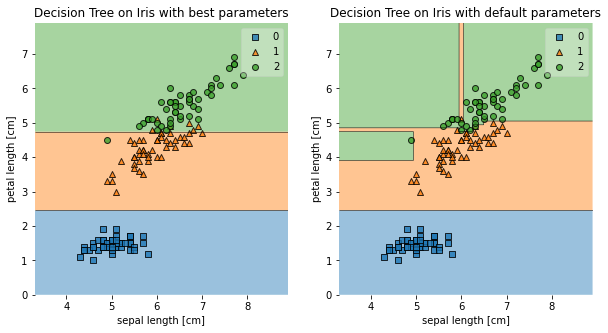

In [150]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_decision_regions(np.array(X),np.array(Y),decision_tree_best)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Decision Tree on Iris with best parameters')
plt.subplot(1,2,2)
plot_decision_regions(np.array(X),np.array(Y),decision_tree_base)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Decision Tree on Iris with default parameters')
plt.show()


#### As you can see decision Tree with default parameters tends to overfit the data,whereas decision Tree with gridsearchcv fit the data more neatly and concisely 